In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn import model_selection, preprocessing, metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [37]:
data = pd.read_csv('/Users/yangxi/Desktop/ECS260/project/cleaned_project_list.csv')

In [38]:
data = pd.read_csv('/Users/yangxi/Desktop/ECS260/project/Filtered_Final_Project_List.csv')

In [39]:
data = data.drop(columns='Unnamed: 0')

In [40]:
data['Project Status'].replace(2,0,inplace=True)

In [41]:
data.columns

Index(['Project Full Name', 'Project Status', 'Project Startdate',
       'Project Enddate', 'PR Number', 'Merged PR Number',
       'First PR Created Time', 'Merge Frequency', 'Comments Number',
       'Commits number', 'Stars', 'Forks', 'size', 'contributor',
       'average_additions', 'average_deletions', 'average_pr_changed_files',
       'average_pr_commits_count', 'average_total_comments',
       'merged_average_additions', 'merged_average_deletions',
       'merged_average_pr_changed_files', 'merged_average_pr_commits_count',
       'merged_average_total_comments'],
      dtype='object')

In [42]:
data_model1 = data.iloc[:,:14]

In [43]:
data_model1['Merged Ratio'] = data_model1['Merged PR Number']/data_model1['PR Number']

In [48]:
data_model1

,Project Full Name,Project Status,Project Startdate,Project Enddate,PR Number,Merged PR Number,First PR Created Time,Merge Frequency,Comments Number,Commits number,Stars,Forks,size,contributor,Merged Ratio
0,apache/Airflow,1,3/31/16,12/19/18,14061,9941,4/20/15 21:52,426,81972,14056,23673,9559,137059,416,0.706991
1,apache/Ambari,1,8/30/11,11/20/13,3235,2913,5/16/13 9:53,120,11378,24588,1561,1340,365411,129,0.900464
2,apache/apex-core,1,8/17/15,4/20/16,604,470,8/25/15 23:43,67,5333,6122,347,180,14807,41,0.778146
3,apache/APISIX,1,10/17/19,7/15/20,2786,2404,5/5/19 8:14,310,21215,2578,7372,1340,24303,236,0.862886
4,apache/AsterixDB,1,2/28/15,4/20/16,11,0,1/14/16 1:21,1,9,8582,213,115,181003,53,0.000000
5,apache/Aurora,1,10/1/13,3/18/15,66,40,12/9/13 19:31,4,236,4091,622,241,30334,92,0.606061
6,apache/incubator-batchee,1,10/3/13,12/10/19,3,0,4/8/14 2:13,0,1,273,12,18,1584,5,0.000000
7,apache/Beam,1,2/1/16,12/21/16,15720,10700,2/26/16 21:57,1429,109123,33494,5066,3244,251011,309,0.680662
8,apache/Calcite,1,5/19/14,10/22/15,2388,673,7/3/14 19:29,133,13668,4762,2751,1507,75982,263,0.281826
9,apache/CarbonData,1,6/2/16,4/19/17,4083,179,6/28/16 8:30,371,61180,4916,1276,686,83325,176,0.043840


In [49]:
data_model2 = data.iloc[:, 14:]

In [50]:
data_model2['Project Status'] = data['Project Status']

In [51]:
data_model2

,average_additions,average_deletions,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_total_comments,Project Status
0,299.093530,139.467650,6.743547,3.242709,7.135434,118.052030,113.491117,4.318528,1.511421,9.596447,1
1,8932.333333,133.333333,81.000000,9.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,237.365385,64.375000,7.227564,3.862179,5.275641,153.045267,63.641975,6.670782,1.855967,4.716049,1
3,196.054636,25.753311,5.375828,3.415563,3.942053,98.253465,18.641584,4.299010,3.095050,2.649505,1
4,7430.000000,2207.000000,221.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,80.750000,38.812500,35.687500,1.250000,1.562500,0.000000,0.000000,0.000000,0.000000,4.000000,1
6,12.666667,8.333333,4.000000,1.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1
7,772.428657,195.477218,15.331535,7.573141,11.092326,1112.203349,317.004785,21.657895,13.397129,10.846890,1
8,591.449367,137.025317,15.044304,1.645570,1.518987,497.333333,239.000000,18.333333,2.000000,1.000000,1
9,1029.472119,784.841388,19.741016,3.102850,8.114002,348.984615,1412.300000,29.346154,2.361538,8.230769,1


# Exploratory data analysis

# Model 1

In [52]:
data.shape

(100, 24)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Project Full Name                100 non-null    object 
 1   Project Status                   100 non-null    int64  
 2   Project Startdate                100 non-null    object 
 3   Project Enddate                  100 non-null    object 
 4   PR Number                        100 non-null    int64  
 5   Merged PR Number                 100 non-null    int64  
 6   First PR Created Time            100 non-null    object 
 7   Merge Frequency                  100 non-null    int64  
 8   Comments Number                  100 non-null    int64  
 9   Commits number                   100 non-null    int64  
 10  Stars                            100 non-null    int64  
 11  Forks                            100 non-null    int64  
 12  size                   

In [54]:
data.describe()

,Project Status,PR Number,Merged PR Number,Merge Frequency,Comments Number,Commits number,Stars,Forks,size,contributor,average_additions,average_deletions,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_total_comments
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.760000,2072.590000,1246.660000,126.410000,14465.610000,5296.840000,3270.080000,1333.65000,104611.990000,110.12000,4036.437659,926.085036,52.942584,9.050037,4.063847,1306.791667,411.263428,19.871084,3.341565,3.541109
std,0.429235,3349.345418,2199.928907,268.546371,26746.798424,6806.979881,6975.443903,3181.00207,122057.420009,119.50033,13203.427955,2062.388403,170.022353,16.634972,3.560006,5290.205543,875.581584,39.201704,5.080324,4.786121
min,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,9.000000,5.00000,132.000000,3.00000,6.000000,0.000000,1.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,67.500000,17.500000,2.000000,229.000000,893.000000,90.250000,60.00000,10839.500000,18.00000,330.175325,95.153585,9.435484,2.164147,1.329053,15.750000,1.125000,1.500000,0.750000,0.000000
50%,1.000000,521.500000,200.000000,22.500000,2424.500000,2700.000000,415.500000,187.50000,38832.000000,51.50000,639.135200,232.657617,18.103036,3.863421,3.367563,327.922302,106.559948,9.785477,2.000000,2.380262
75%,1.000000,2727.500000,1657.500000,135.500000,17506.000000,6833.750000,2397.250000,937.00000,176019.000000,178.75000,1404.575442,749.539577,24.222334,6.787569,5.649123,648.647622,352.058291,17.613525,3.924015,4.719440
max,1.000000,17026.000000,10700.000000,1892.000000,143228.000000,33494.000000,40000.000000,24263.00000,439565.000000,440.00000,84843.230770,14679.153850,1579.750000,116.333333,16.750000,50098.763160,6038.384615,268.769231,32.582474,29.250000


We see that there are no missing values or significant outliers in any column.

In [55]:
data.head()

,Project Full Name,Project Status,Project Startdate,Project Enddate,PR Number,Merged PR Number,First PR Created Time,Merge Frequency,Comments Number,Commits number,...,average_additions,average_deletions,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_total_comments
0,apache/Airflow,1,3/31/16,12/19/18,14061,9941,4/20/15 21:52,426,81972,14056,...,299.093530,139.467650,6.743547,3.242709,7.135434,118.052030,113.491117,4.318528,1.511421,9.596447
1,apache/Ambari,1,8/30/11,11/20/13,3235,2913,5/16/13 9:53,120,11378,24588,...,8932.333333,133.333333,81.000000,9.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
2,apache/apex-core,1,8/17/15,4/20/16,604,470,8/25/15 23:43,67,5333,6122,...,237.365385,64.375000,7.227564,3.862179,5.275641,153.045267,63.641975,6.670782,1.855967,4.716049
3,apache/APISIX,1,10/17/19,7/15/20,2786,2404,5/5/19 8:14,310,21215,2578,...,196.054636,25.753311,5.375828,3.415563,3.942053,98.253465,18.641584,4.299010,3.095050,2.649505
4,apache/AsterixDB,1,2/28/15,4/20/16,11,0,1/14/16 1:21,1,9,8582,...,7430.000000,2207.000000,221.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


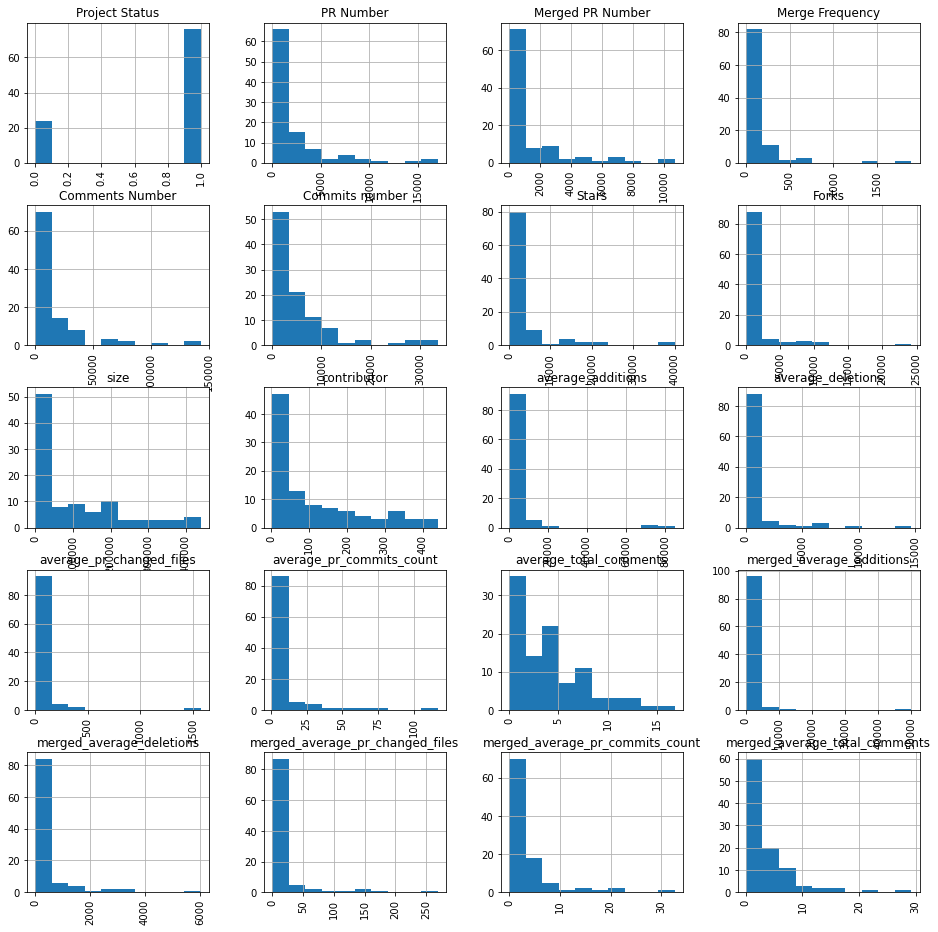

In [56]:
data.hist(figsize=(16,16),xrot = 90)
plt.show()

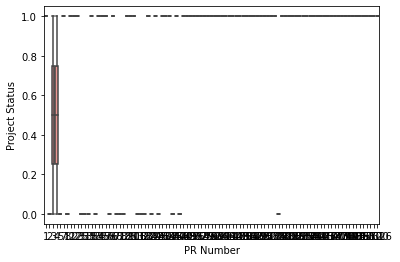

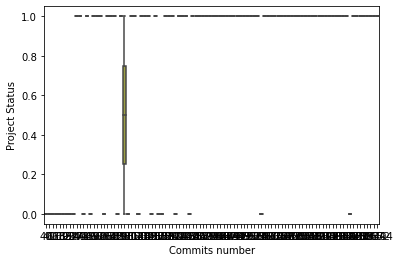

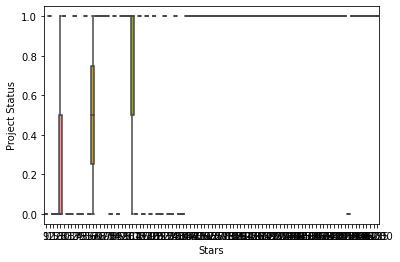

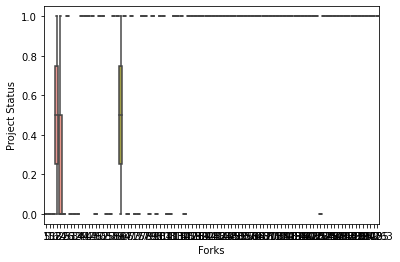

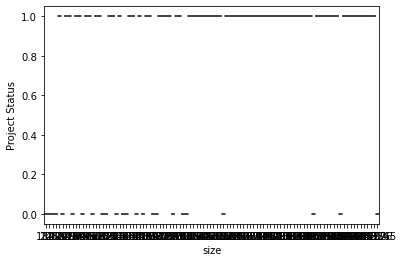

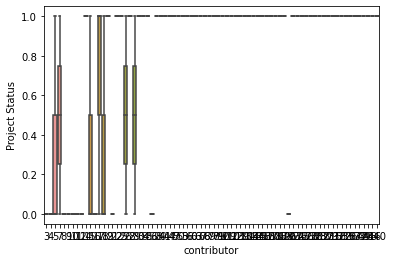

In [60]:
num_cols = ['PR Number',data['Commits number'],data['Stars'],data['Forks'],data['size'],'contributor']

for col in num_cols:
    sns.boxplot(y = data['Project Status'].astype('category'), x=col, data=data)
    plt.show()

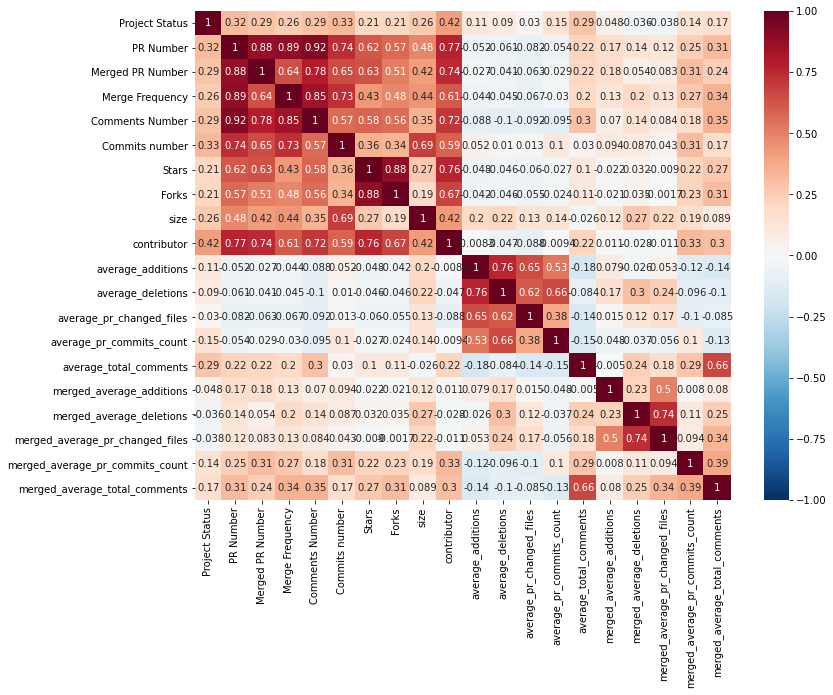

In [61]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

In [62]:
from sklearn import tree
y = data['Project Status']
X = data.iloc[:,4:]

In [63]:
X = X.drop(columns='First PR Created Time')

In [64]:
X = X.to_numpy(dtype=int, copy=True)

In [65]:
y = y.to_numpy(dtype=int, copy=True)

# logistic regression

In [66]:
import statsmodels.api as sm

In [67]:
model = sm.Logit(y, X)

In [68]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.261487
         Iterations 14


In [69]:
result.params

array([-6.19218683e-03, -2.21721168e-04,  1.23290048e-01,  9.20497680e-04,
       -1.44537436e-04, -9.75110446e-04,  6.08510643e-03,  2.57373039e-06,
        3.18119390e-02, -1.69409291e-05, -2.00625279e-04, -1.37389115e-04,
        2.96329994e-02,  5.95607100e-02, -3.54754714e-04,  9.63879173e-04,
       -3.66238829e-02,  6.99979781e-02, -3.89570788e-01])

In [70]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       81
Method:                           MLE   Df Model:                           18
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.5255
Time:                        20:00:22   Log-Likelihood:                -26.149
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                 4.419e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0062      0.006     -0.979      0.327      -0.019       0.006
x2            -0.0002      0.005     -0.045      0.964      -0.010       0.009
x3             0.1233      0.097      1.267      0.205      -0.067       0.314
x4             0.0009      0.001      0.969      0.333      -0.001       0.003
x5            -0.0001      0.000     -0.398      0.691      -0.001       0.001
x6            -0.0010      0.001     -0.990      0.322      -0.003       0.001
x7             0.0061      0.008      0.798      0.425      -0.009       0.021
x8          2.574e-06   4.46e-06      0.577      0.564   -6.18e-06    1.13e-05
x9             0.0318      0.034      0.942      0.346      -0.034       0.098
x10        -1.694e-05      0.000     -0.105      0.917      -0.000       0.000
x11           -0.0002      0.001     -0.178      0.859      -0.002       0.002
x12           -0.0001      0.009     -0.015      0.988      -0.019       0.018
x13            0.0296      0.055      0.543      0.587      -0.077       0.137
x14            0.0596      0.184      0.323      0.747      -0.302       0.421
x15           -0.0004      0.001     -0.533      0.594      -0.002       0.001
x16            0.0010      0.002      0.502      0.616      -0.003       0.005
x17           -0.0366      0.049     -0.741      0.459      -0.134       0.060
x18            0.0700      0.162      0.433      0.665      -0.247       0.387
x19           -0.3896      0.245     -1.593      0.111      -0.869       0.090
==============================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# todo：


    decision tree

[Text(131.52857142857144, 203.85, 'X[8] <= 21.5\ngini = 0.324\nsamples = 123\nvalue = [25, 98]'),
 Text(47.82857142857143, 176.67000000000002, 'X[4] <= 255.0\ngini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(23.914285714285715, 149.49, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(71.74285714285715, 149.49, 'X[6] <= 62.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(47.82857142857143, 122.31, 'X[4] <= 726.5\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(23.914285714285715, 95.13, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(71.74285714285715, 95.13, 'X[4] <= 1136.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(47.82857142857143, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(95.65714285714286, 67.94999999999999, 'X[5] <= 55.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(71.74285714285715, 40.77000000000001, 'X[0] <= 55.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(47.82857142857143, 13.590000000000003, 'gini = 0.

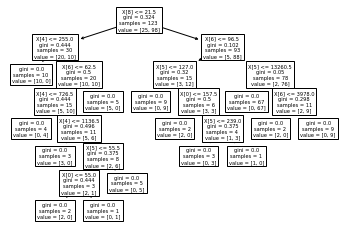

In [109]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

# model 2

In [71]:
data_model2

,average_additions,average_deletions,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_total_comments,Project Status
0,299.093530,139.467650,6.743547,3.242709,7.135434,118.052030,113.491117,4.318528,1.511421,9.596447,1
1,8932.333333,133.333333,81.000000,9.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,237.365385,64.375000,7.227564,3.862179,5.275641,153.045267,63.641975,6.670782,1.855967,4.716049,1
3,196.054636,25.753311,5.375828,3.415563,3.942053,98.253465,18.641584,4.299010,3.095050,2.649505,1
4,7430.000000,2207.000000,221.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,80.750000,38.812500,35.687500,1.250000,1.562500,0.000000,0.000000,0.000000,0.000000,4.000000,1
6,12.666667,8.333333,4.000000,1.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1
7,772.428657,195.477218,15.331535,7.573141,11.092326,1112.203349,317.004785,21.657895,13.397129,10.846890,1
8,591.449367,137.025317,15.044304,1.645570,1.518987,497.333333,239.000000,18.333333,2.000000,1.000000,1
9,1029.472119,784.841388,19.741016,3.102850,8.114002,348.984615,1412.300000,29.346154,2.361538,8.230769,1


In [77]:
data_model2['Project Status'].replace(2,0,inplace=True)

In [76]:
data_model2['Code Churn'] = data_model2['average_additions'] + data_model2['average_deletions']

In [78]:
data_model2 = data_model2.drop(columns='average_additions')
data_model2 = data_model2.drop(columns='average_deletions')

In [79]:
data_model2.shape

(100, 10)

In [80]:
data_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   average_pr_changed_files         100 non-null    float64
 1   average_pr_commits_count         100 non-null    float64
 2   average_total_comments           100 non-null    float64
 3   merged_average_additions         100 non-null    float64
 4   merged_average_deletions         100 non-null    float64
 5   merged_average_pr_changed_files  100 non-null    float64
 6   merged_average_pr_commits_count  100 non-null    float64
 7   merged_average_total_comments    100 non-null    float64
 8   Project Status                   100 non-null    int64  
 9   Code Churn                       100 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 7.9 KB


In [81]:
data_model2.describe()

,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_total_comments,Project Status,Code Churn
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,52.942584,9.050037,4.063847,1306.791667,411.263428,19.871084,3.341565,3.541109,0.760000,4962.522695
std,170.022353,16.634972,3.560006,5290.205543,875.581584,39.201704,5.080324,4.786121,0.429235,14831.946509
min,1.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,9.435484,2.164147,1.329053,15.750000,1.125000,1.500000,0.750000,0.000000,1.000000,458.777093
50%,18.103036,3.863421,3.367563,327.922302,106.559948,9.785477,2.000000,2.380262,1.000000,983.566262
75%,24.222334,6.787569,5.649123,648.647622,352.058291,17.613525,3.924015,4.719440,1.000000,2044.573581
max,1579.750000,116.333333,16.750000,50098.763160,6038.384615,268.769231,32.582474,29.250000,1.000000,99522.384620


In [82]:
data_model2.head()

,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_total_comments,Project Status,Code Churn
0,6.743547,3.242709,7.135434,118.052030,113.491117,4.318528,1.511421,9.596447,1,438.561180
1,81.000000,9.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1,9065.666666
2,7.227564,3.862179,5.275641,153.045267,63.641975,6.670782,1.855967,4.716049,1,301.740385
3,5.375828,3.415563,3.942053,98.253465,18.641584,4.299010,3.095050,2.649505,1,221.807947
4,221.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,9637.000000


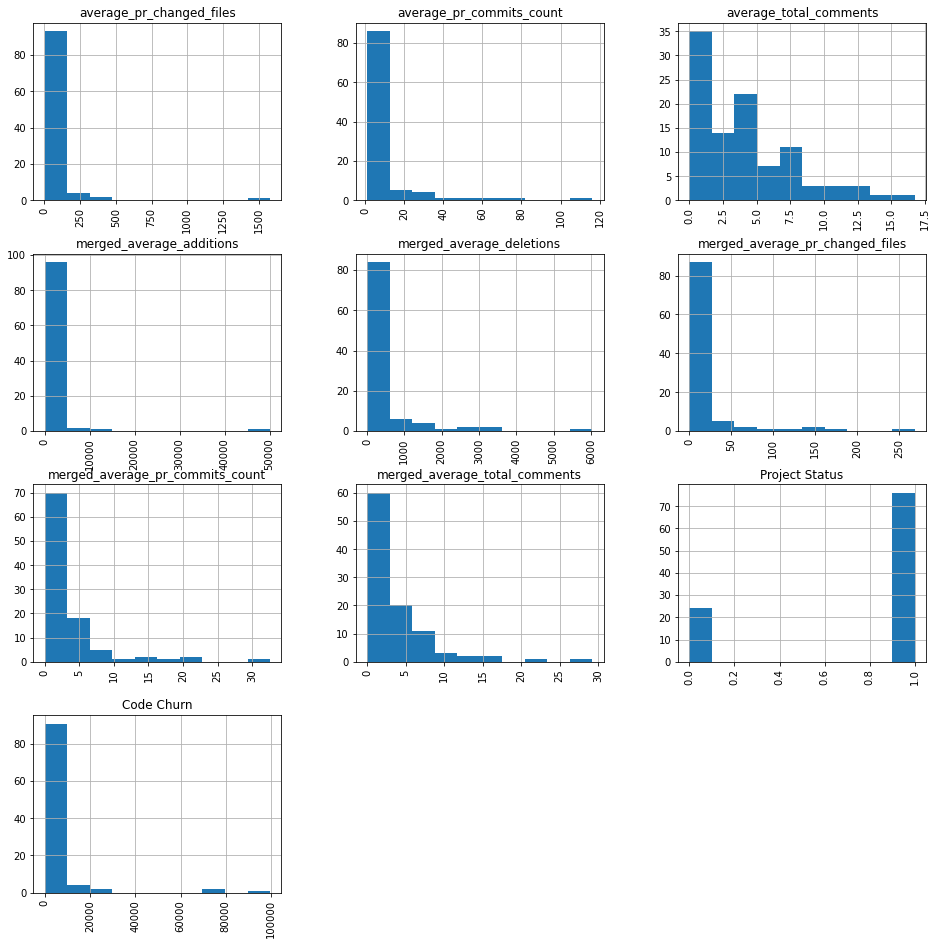

In [83]:
data_model2.hist(figsize=(16,16),xrot = 90)
plt.show()

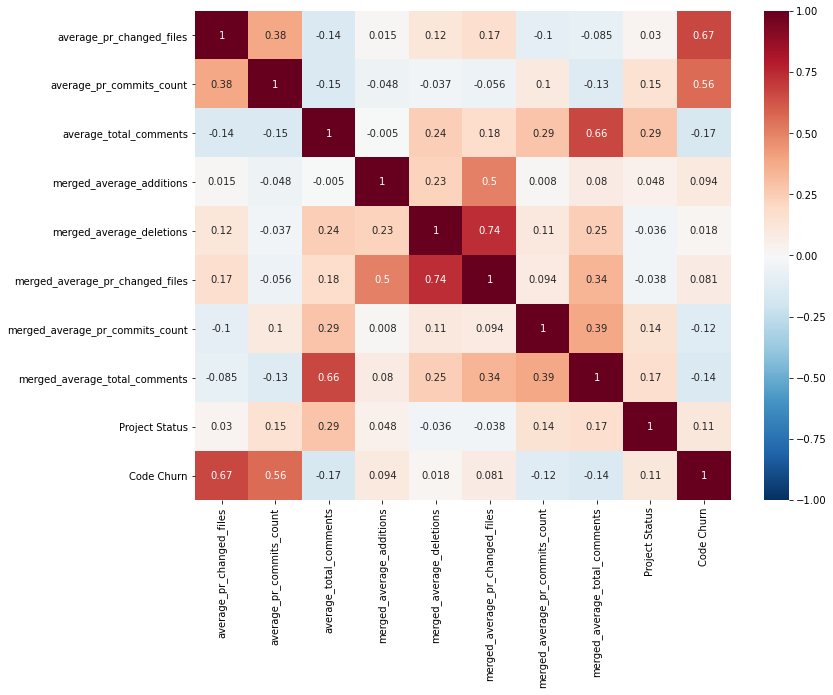

In [84]:
corrmat = data_model2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

In [87]:
y2 = data_model2['Project Status']
X2 = data_model2.drop(columns='Project Status')

In [88]:
X2

,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_total_comments,Code Churn
0,6.743547,3.242709,7.135434,118.052030,113.491117,4.318528,1.511421,9.596447,438.561180
1,81.000000,9.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,9065.666666
2,7.227564,3.862179,5.275641,153.045267,63.641975,6.670782,1.855967,4.716049,301.740385
3,5.375828,3.415563,3.942053,98.253465,18.641584,4.299010,3.095050,2.649505,221.807947
4,221.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9637.000000
5,35.687500,1.250000,1.562500,0.000000,0.000000,0.000000,0.000000,4.000000,119.562500
6,4.000000,1.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
7,15.331535,7.573141,11.092326,1112.203349,317.004785,21.657895,13.397129,10.846890,967.905875
8,15.044304,1.645570,1.518987,497.333333,239.000000,18.333333,2.000000,1.000000,728.474684
9,19.741016,3.102850,8.114002,348.984615,1412.300000,29.346154,2.361538,8.230769,1814.313507


In [62]:
X2 = X2.to_numpy(dtype=int, copy=True)
y2 = y2.to_numpy(dtype=int, copy=True)

In [63]:
import statsmodels.api as sm
model2 = sm.Logit(y2, X2)
result2 = model2.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.450947
         Iterations 10


In [64]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            9
Date:                Mon, 22 Nov 2021   Pseudo R-squ.:                  0.1196
Time:                        22:20:25   Log-Likelihood:                -51.859
converged:                       True   LL-Null:                       -58.906
Covariance Type:            nonrobust   LLR p-value:                    0.1190
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0163      0.013     -1.255      0.210      -0.042       0.009
x2             0.0510      0.052      0.976      0.329      -0.051       0.153
x3             0.3852      0.157      2.450      0.014       0.077       0.693
x4         -6.116e-05      0.000     -0.434      0.664      -0.000       0.000
x5            -0.0003      0.001     -0.438      0.661      -0.002       0.001
x6            -0.0031      0.024     -0.134      0.894      -0.049       0.043
x7             0.0853      0.121      0.708      0.479      -0.151       0.322
x8             2.5554      1.252      2.041      0.041       0.101       5.010
x9            -1.2244      0.624     -1.962      0.050      -2.447      -0.001
x10            0.0003      0.000      1.297      0.195      -0.000       0.001
==============================================================================
"""